Logistic regression
1. Download data from https://science.sciencemag.org/content/359/6378/926 (supplementary materials).

    read the abstract of the article to get familiar with data origin
    open the data in excel and get familiar with its content
    load the protein level data (you need to figure out which one is that) as a pandas dataframe
    handle missing values and convert features to numeric values when it is needed
    get rid of the unnecessary (which does not encode protein levels or the tumor type) columns and the CancerSEEK results


In [1]:
import pandas as pd
import sklearn.metrics

In [2]:
df = pd.read_excel( "data/aar3247_cohen_sm_tables-s1-s11.xlsx",engine='openpyxl',sheet_name='Table S6',skiprows=2)
df

,Patient ID #,Sample ID #,Tumor type,AJCC Stage,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),...,sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
0,CRC 455,CRC 455 PLS 1,Colorectum,I,1583.45,5598.5,3621.04,5.09,19.08,*16.452,...,*204.792,55.06,6832.07,9368.53,*16.086,21863.7,56428.7,39498.82,0.938342,Positive
1,CRC 456,CRC 456 PLS 1,Colorectum,I,*715.308,20936.3,2772.96,7.27,10.04,40.91,...,*204.792,72.92,5549.47,6224.55,*16.086,29669.7,73940.5,41277.09,0.925363,Positive
2,CRC 457,CRC 457 PLS 1,Colorectum,II,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,...,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.3,28440.60,0.852367,Negative
3,CRC 458,CRC 458 PLS 1,Colorectum,II,*715.308,1604.34,2029.96,5.39,8.31,*16.452,...,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.2,25896.73,0.617639,Negative
4,CRC 459,CRC 459 PLS 1,Colorectum,II,801.3,2087.57,2069.17,*4.854,11.73,*16.452,...,*204.792,78.07,5447.93,6982.32,*16.086,2311.91,56288.5,49425.20,0.318434,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,PAPA 1357,PAPA 1357 PLS 1,Ovary,III,*879.498,3546.43,1493.32,1428.31,**836.85,37.9,...,*207.24,72.22,3967.55,4045.18,*16.89,12877.1,88464,47219.24,1.000000,Positive
1817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1818,*Protein concentration below the limit of dete...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1819,**Protein concentration above the limit of det...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.loc[df.index < 1817]
df

,Patient ID #,Sample ID #,Tumor type,AJCC Stage,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),...,sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
0,CRC 455,CRC 455 PLS 1,Colorectum,I,1583.45,5598.5,3621.04,5.09,19.08,*16.452,...,*204.792,55.06,6832.07,9368.53,*16.086,21863.7,56428.7,39498.82,0.938342,Positive
1,CRC 456,CRC 456 PLS 1,Colorectum,I,*715.308,20936.3,2772.96,7.27,10.04,40.91,...,*204.792,72.92,5549.47,6224.55,*16.086,29669.7,73940.5,41277.09,0.925363,Positive
2,CRC 457,CRC 457 PLS 1,Colorectum,II,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,...,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.3,28440.60,0.852367,Negative
3,CRC 458,CRC 458 PLS 1,Colorectum,II,*715.308,1604.34,2029.96,5.39,8.31,*16.452,...,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.2,25896.73,0.617639,Negative
4,CRC 459,CRC 459 PLS 1,Colorectum,II,801.3,2087.57,2069.17,*4.854,11.73,*16.452,...,*204.792,78.07,5447.93,6982.32,*16.086,2311.91,56288.5,49425.20,0.318434,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,PAPA 1353,PAPA 1353 PLS 1,Ovary,I,*879.498,1484.7,2096.76,24.82,10.3,42.39,...,*207.24,115.24,5390.31,8538.58,*16.89,*599.4,167800,50128.60,0.980312,Positive
1813,PAPA 1354,PAPA 1354 PLS 1,Ovary,I,1337.33,1607.9,852.37,5.58,9.8,*16.44,...,*207.24,147.17,7951.03,12966.19,*16.89,*599.4,123444,54066.98,0.999995,Positive
1814,PAPA 1355,PAPA 1355 PLS 1,Ovary,III,*879.498,1592.84,1044.45,30.48,8.48,*16.44,...,*207.24,104.63,2396.36,1901.41,*16.89,*599.4,104071,39844.02,1.000000,Positive
1815,PAPA 1356,PAPA 1356 PLS 1,Ovary,II,*879.498,5267.95,1445.69,1469.45,23.74,62.26,...,*207.24,73.55,3079.81,5312.90,*16.89,6864.33,110579,42921.13,1.000000,Positive


In [4]:
df.isna().sum()

Patient ID #                              0
Sample ID #                               0
Tumor type                                0
AJCC Stage                              812
AFP (pg/ml)                               0
Angiopoietin-2 (pg/ml)                    0
AXL (pg/ml)                               6
CA-125 (U/ml)                             0
CA 15-3 (U/ml)                            0
CA19-9 (U/ml)                             0
CD44 (ng/ml)                              6
CEA (pg/ml)                               0
CYFRA 21-1 (pg/ml)                        0
DKK1 (ng/ml)                              0
Endoglin (pg/ml)                          0
FGF2 (pg/ml)                              0
Follistatin (pg/ml)                       0
Galectin-3 (ng/ml)                        0
G-CSF (pg/ml)                             7
GDF15 (ng/ml)                             0
HE4 (pg/ml)                               0
HGF (pg/ml)                               0
IL-6 (pg/ml)                    

In [5]:
df = df.drop(columns=['CancerSEEK Test Result','CancerSEEK Logistic Regression Score','Sample ID #','Patient ID #','AJCC Stage'])
df

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
0,Colorectum,1583.45,5598.5,3621.04,5.09,19.08,*16.452,9.81,540.07,*1938.654,...,11606.6,3284.17,*204.792,55.06,6832.07,9368.53,*16.086,21863.7,56428.7,39498.82
1,Colorectum,*715.308,20936.3,2772.96,7.27,10.04,40.91,27.57,5902.43,*1938.654,...,14375,1911.81,*204.792,72.92,5549.47,6224.55,*16.086,29669.7,73940.5,41277.09
2,Colorectum,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,14.59,973.75,1976.94,...,38375,1743.94,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.3,28440.60
3,Colorectum,*715.308,1604.34,2029.96,5.39,8.31,*16.452,7.78,2027.53,*1938.654,...,12072.5,1059.24,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.2,25896.73
4,Colorectum,801.3,2087.57,2069.17,*4.854,11.73,*16.452,12.21,614.49,*1938.654,...,23718.2,1736.92,*204.792,78.07,5447.93,6982.32,*16.086,2311.91,56288.5,49425.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,Ovary,*879.498,1484.7,2096.76,24.82,10.3,42.39,14.92,914,*1970.916,...,58267,2542.26,*207.24,115.24,5390.31,8538.58,*16.89,*599.4,167800,50128.60
1813,Ovary,1337.33,1607.9,852.37,5.58,9.8,*16.44,12.32,1179.51,*1970.916,...,187829,1670.22,*207.24,147.17,7951.03,12966.19,*16.89,*599.4,123444,54066.98
1814,Ovary,*879.498,1592.84,1044.45,30.48,8.48,*16.44,8.26,*443.01,3589.73,...,241440,1194.03,*207.24,104.63,2396.36,1901.41,*16.89,*599.4,104071,39844.02
1815,Ovary,*879.498,5267.95,1445.69,1469.45,23.74,62.26,16.53,*443.01,50659.1,...,140146,1607.16,*207.24,73.55,3079.81,5312.90,*16.89,6864.33,110579,42921.13


In [6]:
df = df.dropna()
df

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
0,Colorectum,1583.45,5598.5,3621.04,5.09,19.08,*16.452,9.81,540.07,*1938.654,...,11606.6,3284.17,*204.792,55.06,6832.07,9368.53,*16.086,21863.7,56428.7,39498.82
1,Colorectum,*715.308,20936.3,2772.96,7.27,10.04,40.91,27.57,5902.43,*1938.654,...,14375,1911.81,*204.792,72.92,5549.47,6224.55,*16.086,29669.7,73940.5,41277.09
2,Colorectum,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,14.59,973.75,1976.94,...,38375,1743.94,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.3,28440.60
3,Colorectum,*715.308,1604.34,2029.96,5.39,8.31,*16.452,7.78,2027.53,*1938.654,...,12072.5,1059.24,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.2,25896.73
4,Colorectum,801.3,2087.57,2069.17,*4.854,11.73,*16.452,12.21,614.49,*1938.654,...,23718.2,1736.92,*204.792,78.07,5447.93,6982.32,*16.086,2311.91,56288.5,49425.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,Ovary,*879.498,1484.7,2096.76,24.82,10.3,42.39,14.92,914,*1970.916,...,58267,2542.26,*207.24,115.24,5390.31,8538.58,*16.89,*599.4,167800,50128.60
1813,Ovary,1337.33,1607.9,852.37,5.58,9.8,*16.44,12.32,1179.51,*1970.916,...,187829,1670.22,*207.24,147.17,7951.03,12966.19,*16.89,*599.4,123444,54066.98
1814,Ovary,*879.498,1592.84,1044.45,30.48,8.48,*16.44,8.26,*443.01,3589.73,...,241440,1194.03,*207.24,104.63,2396.36,1901.41,*16.89,*599.4,104071,39844.02
1815,Ovary,*879.498,5267.95,1445.69,1469.45,23.74,62.26,16.53,*443.01,50659.1,...,140146,1607.16,*207.24,73.55,3079.81,5312.90,*16.89,6864.33,110579,42921.13


In [8]:
for i in df:
    if i == 'Tumor type':
        continue
    df[i] = df[i].astype(str)
    df[i] = df[i].map(lambda x: x.lstrip('*'))
    df[i] = df[i].astype(float)
df

/dlab/home/norbi/Data_mining_and_machine_learning/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/dlab/home/norbi/Data_mining_and_machine_learning/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/dlab/home/norbi/Data_mining_and_machine_learning/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
0,Colorectum,1583.450,5598.50,3621.04,5.090,19.08,16.452,9.81,540.07,1938.654,...,11606.60,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82
1,Colorectum,715.308,20936.35,2772.96,7.270,10.04,40.910,27.57,5902.43,1938.654,...,14374.99,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09
2,Colorectum,4365.530,2350.93,4120.77,4.854,16.96,16.452,14.59,973.75,1976.940,...,38375.00,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60
3,Colorectum,715.308,1604.34,2029.96,5.390,8.31,16.452,7.78,2027.53,1938.654,...,12072.51,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73
4,Colorectum,801.300,2087.57,2069.17,4.854,11.73,16.452,12.21,614.49,1938.654,...,23718.17,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,Ovary,879.498,1484.70,2096.76,24.820,10.30,42.390,14.92,914.00,1970.916,...,58266.97,2542.26,207.240,115.24,5390.31,8538.58,16.890,599.40,167799.61,50128.60
1813,Ovary,1337.330,1607.90,852.37,5.580,9.80,16.440,12.32,1179.51,1970.916,...,187828.79,1670.22,207.240,147.17,7951.03,12966.19,16.890,599.40,123443.76,54066.98
1814,Ovary,879.498,1592.84,1044.45,30.480,8.48,16.440,8.26,443.01,3589.730,...,241440.02,1194.03,207.240,104.63,2396.36,1901.41,16.890,599.40,104070.89,39844.02
1815,Ovary,879.498,5267.95,1445.69,1469.450,23.74,62.260,16.53,443.01,50659.050,...,140145.70,1607.16,207.240,73.55,3079.81,5312.90,16.890,6864.33,110579.24,42921.13


In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
def getting_train_val(dataframe, interval=2):
    train = dataframe[::interval]
    test = dataframe[~dataframe.index.isin(dataframe[::interval].index)].dropna()
    return train, test

In [11]:
X_train, X_test = getting_train_val(df.drop(columns=['Tumor type']))
y_train, y_test = getting_train_val(df[['Tumor type']])
# X_train, X_test, y_train, y_test = train_test_split(cancerdf.drop(columns=['Tumor type']),cancerdf['Tumor type'])

In [12]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train['Tumor type'])

/dlab/home/norbi/Data_mining_and_machine_learning/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [13]:
y_predict = LogReg.predict(X_test)
y_predict

array(['Colorectum', 'Colorectum', 'Normal', 'Normal', 'Normal', 'Normal',
       'Colorectum', 'Normal', 'Colorectum', 'Normal', 'Colorectum',
       'Colorectum', 'Colorectum', 'Normal', 'Colorectum', 'Normal',
       'Colorectum', 'Colorectum', 'Colorectum', 'Normal', 'Colorectum',
       'Normal', 'Normal', 'Colorectum', 'Colorectum', 'Colorectum',
       'Normal', 'Normal', 'Colorectum', 'Colorectum', 'Normal', 'Normal',
       'Colorectum', 'Normal', 'Colorectum', 'Colorectum', 'Normal',
       'Colorectum', 'Lung', 'Breast', 'Colorectum', 'Colorectum',
       'Breast', 'Colorectum', 'Colorectum', 'Colorectum', 'Colorectum',
       'Colorectum', 'Colorectum', 'Breast', 'Colorectum', 'Lung',
       'Breast', 'Colorectum', 'Breast', 'Colorectum', 'Stomach',
       'Colorectum', 'Breast', 'Breast', 'Pancreas', 'Breast', 'Lung',
       'Normal', 'Colorectum', 'Colorectum', 'Normal', 'Breast',
       'Colorectum', 'Colorectum', 'Breast', 'Colorectum', 'Colorectum',
       'Colorectum'

In [14]:
y_test

,Tumor type
1,Colorectum
3,Colorectum
5,Colorectum
7,Colorectum
9,Colorectum
...,...
1807,Ovary
1809,Ovary
1811,Ovary
1813,Ovary


In [15]:
plot_dict = {x:{y:0 for y in set(y_test['Tumor type'])} for x in set(y_test['Tumor type'])}
print(plot_dict)
for index,value in enumerate(y_test['Tumor type']):
    plot_dict[value][y_predict[index]] += 1

plot_dict = {x:[y for y in y.values()] for x,y in plot_dict.items()}
print(plot_dict)
plotdf = pd.DataFrame.from_dict(plot_dict)
plotdf.index= plot_dict.keys()
plotdf

{'Esophagus': {'Esophagus': 0, 'Normal': 0, 'Liver': 0, 'Ovary': 0, 'Stomach': 0, 'Colorectum': 0, 'Breast': 0, 'Pancreas': 0, 'Lung': 0}, 'Normal': {'Esophagus': 0, 'Normal': 0, 'Liver': 0, 'Ovary': 0, 'Stomach': 0, 'Colorectum': 0, 'Breast': 0, 'Pancreas': 0, 'Lung': 0}, 'Liver': {'Esophagus': 0, 'Normal': 0, 'Liver': 0, 'Ovary': 0, 'Stomach': 0, 'Colorectum': 0, 'Breast': 0, 'Pancreas': 0, 'Lung': 0}, 'Ovary': {'Esophagus': 0, 'Normal': 0, 'Liver': 0, 'Ovary': 0, 'Stomach': 0, 'Colorectum': 0, 'Breast': 0, 'Pancreas': 0, 'Lung': 0}, 'Stomach': {'Esophagus': 0, 'Normal': 0, 'Liver': 0, 'Ovary': 0, 'Stomach': 0, 'Colorectum': 0, 'Breast': 0, 'Pancreas': 0, 'Lung': 0}, 'Colorectum': {'Esophagus': 0, 'Normal': 0, 'Liver': 0, 'Ovary': 0, 'Stomach': 0, 'Colorectum': 0, 'Breast': 0, 'Pancreas': 0, 'Lung': 0}, 'Breast': {'Esophagus': 0, 'Normal': 0, 'Liver': 0, 'Ovary': 0, 'Stomach': 0, 'Colorectum': 0, 'Breast': 0, 'Pancreas': 0, 'Lung': 0}, 'Pancreas': {'Esophagus': 0, 'Normal': 0, 'Liver

,Esophagus,Normal,Liver,Ovary,Stomach,Colorectum,Breast,Pancreas,Lung
Esophagus,1,0,0,0,2,5,0,1,0
Normal,5,365,1,3,8,38,40,23,8
Liver,0,0,12,0,0,3,0,0,0
Ovary,0,0,0,9,0,3,1,0,3
Stomach,0,0,0,1,3,10,0,0,0
Colorectum,13,19,8,13,17,120,32,11,23
Breast,0,9,3,0,3,9,22,3,6
Pancreas,0,5,0,1,0,1,6,10,1
Lung,0,1,0,1,2,8,1,0,8


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

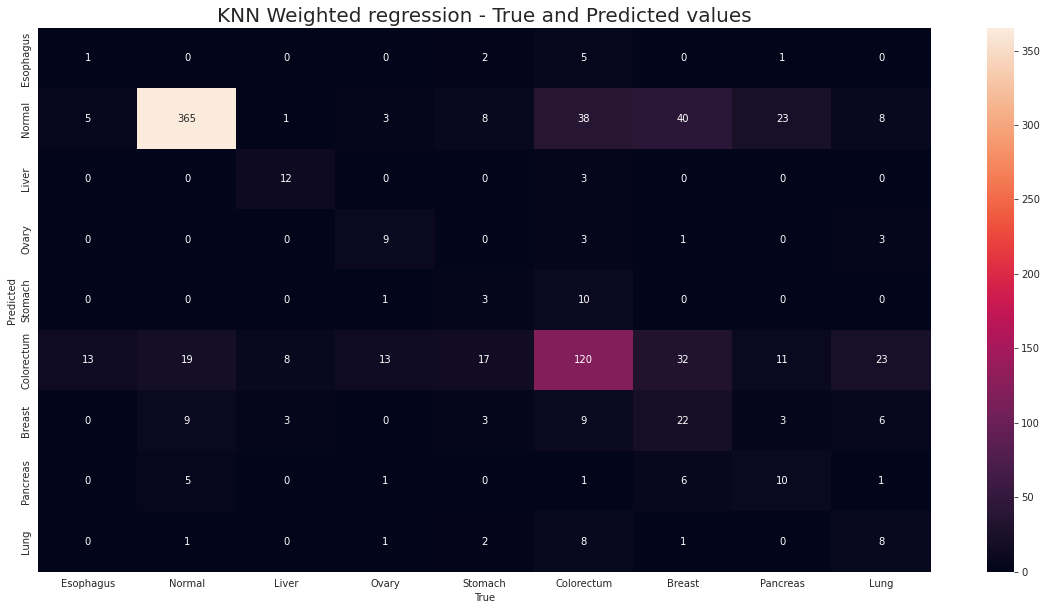

In [17]:
plt.figure(figsize = (20,10))
sns.heatmap(plotdf, annot=True,fmt='g')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Cancer Type - True and Predicted", fontsize=20)
plt.show()

In [39]:
l_probs = LogReg.predict_proba(X_test)
l_probs = l_probs[:, 1]

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

In [45]:
r_auc = roc_auc_score(y_test, l_probs)

ValueError: multi_class must be in ('ovo', 'ovr')

In [42]:
r_fpr, r_tpr, _ = roc_curve(y_test, l_probs,pos_label='Tumor type')

/dlab/home/norbi/Data_mining_and_machine_learning/lib/python3.6/site-packages/sklearn/metrics/_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()